In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
reviews=[]
ratings = []
dataframe = pd.DataFrame()
dataframe['Review'] = 0
for i in range(2,24):    
    url = 'https://www.flipkart.com/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-thin-light-laptop/product-reviews/itmcf5d0bf3be2d5?pid=COMG4Z359A4Z3MFG&lid=LSTCOMG4Z359A4Z3MFGOJQLGB&marketplace=FLIPKART&page={}'.format(i)
    res = requests.get(url)
    soup=BeautifulSoup(res.content,'html.parser')
    scraped_review=soup.find_all('div', class_="t-ZTKy" )
    scraped_rating=soup.find_all('div', class_="_3LWZlK _1BLPMq" )
    for j in scraped_review:
        review=j.get_text().replace('\n','') # replacing newline
        review=review.strip(' ') # to remove all white spaces, tabs and newline
        reviews.append(review)
        dataframe.loc[len(dataframe.index)] = review

In [3]:
dataframe

,Review
0,"Worst product, Am requesting people not to buy..."
1,Laptop getting hang after 3hr of useREAD MORE
2,"I Got this laptop 90 days ago, i got it in 320..."
3,It is was very excellent laptopPerformance als...
4,Display quality is not satisfactory in 50k bud...
...,...
155,The laptop's booting time is awesomeREAD MORE
156,There should be a hybrid storage provision wit...
157,Performance is good but display is averageREAD...
158,Very good performance. I have used it for two ...


In [4]:
for i in range(len(dataframe['Review'])):
    dataframe['Review'][i] = dataframe['Review'][i].strip()

In [5]:
dataframe

,Review
0,"Worst product, Am requesting people not to buy..."
1,Laptop getting hang after 3hr of useREAD MORE
2,"I Got this laptop 90 days ago, i got it in 320..."
3,It is was very excellent laptopPerformance als...
4,Display quality is not satisfactory in 50k bud...
...,...
155,The laptop's booting time is awesomeREAD MORE
156,There should be a hybrid storage provision wit...
157,Performance is good but display is averageREAD...
158,Very good performance. I have used it for two ...


In [6]:
##Parts of speech tagging
all_reviews = []
for i in range(len(dataframe['Review'])):
    all_reviews.append(dataframe['Review'][i])
print(all_reviews)

["Worst product, Am requesting people not to buy this laptop, today is the 15th day, am facing lot of issues with this laptop, Battery- OverheatsDisplay-very dull and getting blurred, suddenly screen turns blank.Performance- Worst VALUE FOR MONEY- ZERO PEOPLE AM REQUESTING NOT TO WASTE YOUR MONEY, PLZ INVEST IN OTHER LAPTOPsCUSTOMER SUPPORT-WORST, Doesn't care about the feelings, they won't care about our satisfaction.Even Higher officials doesn't care, they keep us waiting, keeps our ca...READ MORE", 'Laptop getting hang after 3hr of useREAD MORE', 'I Got this laptop 90 days ago, i got it in 32000 8 have never seen such a beautiful laptop, and it is so much faster it booting time only 1 seconds i dont know why someone did not like display but display is also very good, just need to do setting, i have played GTA-5,  prince of percia i did not face any problem. it works very nice. Sound is little bit slow but i use bluetooth so i dont have any issue. It charge only in 1 hour full charge

In [7]:
all_reviews = ' '.join(all_reviews)
all_reviews

'Worst product, Am requesting people not to buy this laptop, today is the 15th day, am facing lot of issues with this laptop, Battery- OverheatsDisplay-very dull and getting blurred, suddenly screen turns blank.Performance- Worst VALUE FOR MONEY- ZERO PEOPLE AM REQUESTING NOT TO WASTE YOUR MONEY, PLZ INVEST IN OTHER LAPTOPsCUSTOMER SUPPORT-WORST, Doesn\'t care about the feelings, they won\'t care about our satisfaction.Even Higher officials doesn\'t care, they keep us waiting, keeps our ca...READ MORE Laptop getting hang after 3hr of useREAD MORE I Got this laptop 90 days ago, i got it in 32000 8 have never seen such a beautiful laptop, and it is so much faster it booting time only 1 seconds i dont know why someone did not like display but display is also very good, just need to do setting, i have played GTA-5,  prince of percia i did not face any problem. it works very nice. Sound is little bit slow but i use bluetooth so i dont have any issue. It charge only in 1 hour full charge, an

In [8]:
import re
for i in range(len(dataframe['Review'])):
    dataframe['Review'][i] = re.sub('READ MORE','',dataframe['Review'][i])
    dataframe['Review'][i] = re.sub('OverallDisplay 3/5Battery 4/5Performance 5/5Connectivity 5/5Sound quality 5/5Keyboard 4/5','',dataframe['Review'][i])

In [9]:
dataframe

,Review
0,"Worst product, Am requesting people not to buy..."
1,Laptop getting hang after 3hr of use
2,"I Got this laptop 90 days ago, i got it in 320..."
3,It is was very excellent laptopPerformance als...
4,Display quality is not satisfactory in 50k bud...
...,...
155,The laptop's booting time is awesome
156,There should be a hybrid storage provision wit...
157,Performance is good but display is average
158,Very good performance. I have used it for two ...


In [10]:
dataframe.isna().sum()

Review    0
dtype: int64

In [11]:
nlp = spacy.load('en_core_web_sm')
review_1 = nlp(all_reviews)
spacy.displacy.render(review_1, style='ent', jupyter=True)

In [12]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in review_1 if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['today', 'day', 'facing', 'lot', 'issues', 'laptop', 'blurred', 'screen', 'turns', 'VALUE', 'PEOPLE', 'REQUESTING', 'WASTE', 'MONEY', 'INVEST', 'care', 'feelings', 'care', 'satisfaction', 'officials']


In [13]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,laptop,80
1,read,65
2,display,53
3,performance,36
4,product,32
5,quality,30
6,battery,24
7,price,24
8,working,20
9,money,19


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

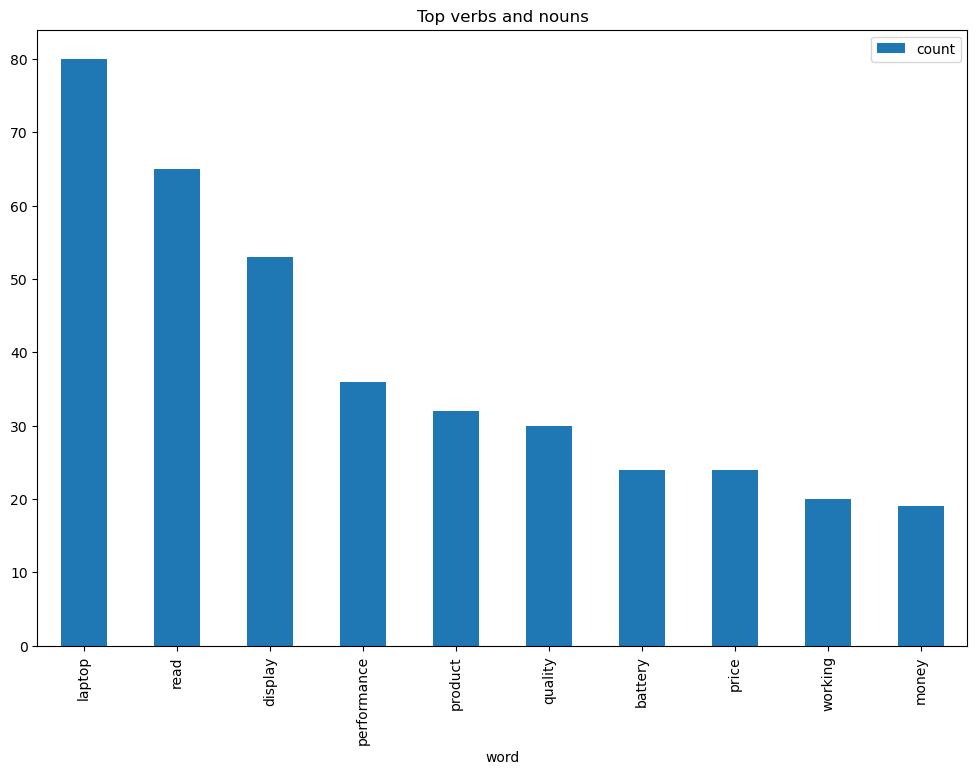

In [14]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [15]:
#Sentiment analysis
afinn = pd.read_csv(r"F:\Data Science\Regular_Classes\27. NER\Afinn.csv", sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [16]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [17]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize("".join(all_reviews))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['After using only for 4 days, screen started becoming black and started blinking suddenly(4-5 times).Though I returned it today and got the refund.READ MORE Superb laptop with super battery backup.',
 'I mostly used this laptop for normal use and meetings on zoom or WebEx.',
 'And it gives at least 7 hrs of battery backup with single charge.',
 'Also it supports fast charging so this laptop gets fully charged in less than 1.5 hrs which is very good.One thing is missing that type C socket and keyboard light.',
 'Otherwise laptop is very fabulous.READ MORE Battery :- 3 hours max (biggest cons)Design:- Great look n feel.',
 'Performance :- Amazing.',
 "Display :- brightness level is good, screen is not IPS panel and so it's not very shiny and side angles visibility is low.",
 'But you are buying a laptop and not TV.',
 'Also on keyboard, FN key is always On so pressing F1 to F12 Activates function keys instead of F1 to F12 value.',
 "To sort this out use FN key + ESC key.READ MORE Pure f

In [18]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"Worst product, Am requesting people not to buy..."
1,it works very nice.
2,Sound is little bit slow but i use bluetooth s...
3,"It charge only in 1 hour full charge, and you ..."
4,It starts only ...READ MORE It is was very exc...
...,...
176,Go fr itREAD MORE Best Laptop Redmibook Pro i5...
177,But keyboard not having light.READ MORE Keypad...
178,Packing and transporting is good.READ MORE Bes...
179,I have used it for two weeks now.


In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [20]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [21]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    148
1      4
2     15
3     16
4     48
5     30
6     14
7     13
8     30
9     17
Name: word_count, dtype: int64

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    148
1      4
2     15
3     16
4     48
5     30
6     14
7     13
8     30
9     17
Name: word_count, dtype: int64

In [24]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,word_count,sentiment_value
73,Good but not Great At this price try to get th...,44,11
41,Better we go for a good branded laptop company...,199,11
14,To sort this out use FN key + ESC key.READ MOR...,123,11
25,😅Battery is good for normal workOkay so so man...,59,11
63,Don't buy thisREAD MORE Overall ok in this pri...,75,14
91,Very fastREAD MORE Very goodREAD MORE Best at ...,90,15
138,Think and buyREAD MORE Plz don't buy this prod...,90,16
178,Packing and transporting is good.READ MORE Bes...,62,16
174,Totally disappointed.READ MORE This is my 1st ...,82,25
65,Performance is good.Price must be less.Overal...,191,38


In [25]:
sent_df[sent_df['sentiment_value'] <= 0]

,sentence,word_count,sentiment_value
2,Sound is little bit slow but i use bluetooth s...,15,0
3,"It charge only in 1 hour full charge, and you ...",16,0
6,I mostly used this laptop for normal use and m...,14,0
7,And it gives at least 7 hrs of battery backup ...,13,0
12,But you are buying a laptop and not TV.,9,0
...,...,...,...
172,And no service centre has keyboard parts and t...,17,-3
173,Suffering from one month but and not able to w...,10,-2
177,But keyboard not having light.READ MORE Keypad...,46,0
179,I have used it for two weeks now.,8,0


In [26]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,word_count,sentiment_value
65,Performance is good.Price must be less.Overal...,191,38
174,Totally disappointed.READ MORE This is my 1st ...,82,25


In [27]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

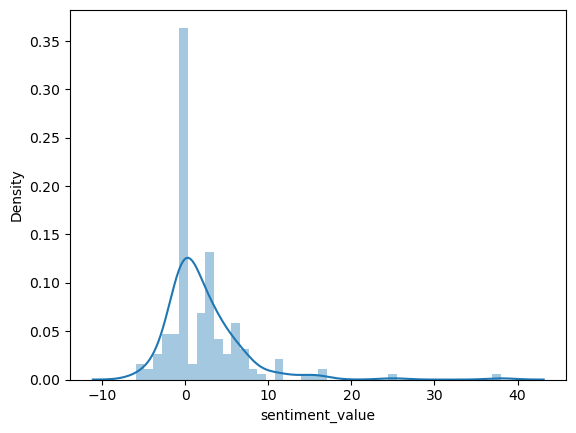

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

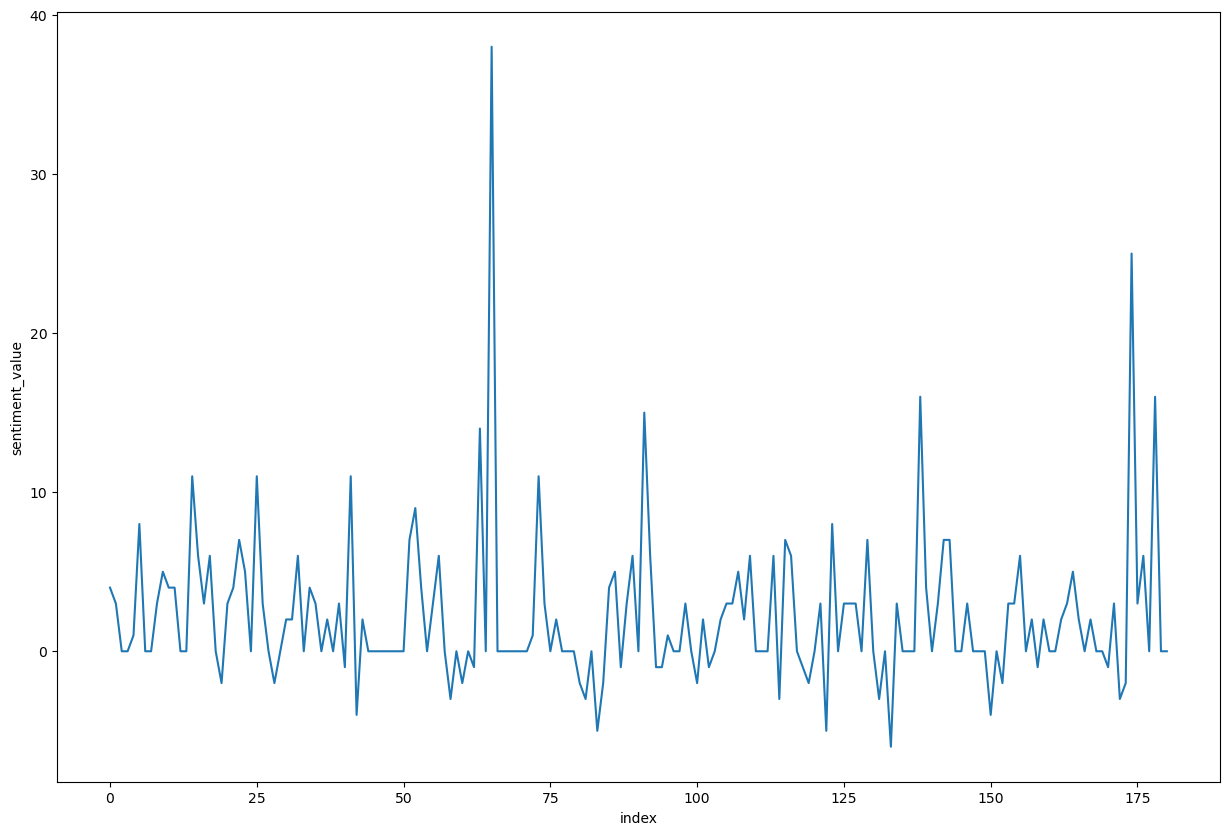

In [29]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

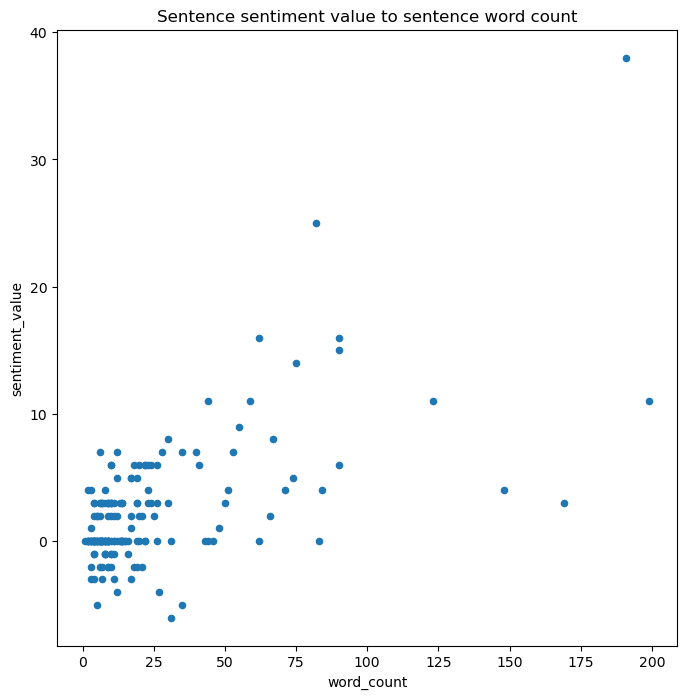

In [30]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')